<a href="https://colab.research.google.com/github/MrSaral/GSoC_QMLHEP_Exercise/blob/master/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


Hello, I am Saral Uttamani, CS Grad student at Stony Brook University. (Class of 2020) This is my submission for the Google Summer of Code QMLHEP coding exercise. There are two tasks, this is the machine learning exercise. I have tried to put comments and use variable names which are intiutive. If there are any questions, feel free to reach out on GitHub/LinkedIn.

# Data Loading


In [1]:
#Location of the data file
cd drive/My\ Drive/Colab\ Notebooks/GSoC_QML/data

/content/drive/My Drive/Colab Notebooks/GSoC_QML/data


In [2]:
ls

test_input.npy  training_input.npy


In [0]:
#Libraries
import numpy as np
import pandas as pd
import collections
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
#Data loading
train_data = np.load('training_input.npy',allow_pickle=True)
test_data = np.load('test_input.npy', allow_pickle=True)

# Data Preprocessing and Feature Engineering

In [0]:
#Converting to Numpy array format
X=np.append(pd.DataFrame(train_data[()]['0']).values,pd.DataFrame(train_data[()]['1']).values,axis=0)

In [0]:
X_test=np.append(pd.DataFrame(test_data[()]['0']).values,pd.DataFrame(test_data[()]['1']).values,axis=0)

In [625]:
X

array([[-0.43079088,  0.86834819, -0.92614721, -0.92662029, -0.56900862],
       [ 0.33924198,  0.56155499,  0.93097459, -0.91631726, -0.54463516],
       [-0.42888879,  0.87064961, -0.92782179, -0.77533991, -0.58329176],
       [-0.43262871,  0.86128919, -0.92240878, -0.88048862, -0.49963115],
       [-0.99925345, -0.99949586,  0.07753685, -0.84218034, -0.5149399 ],
       [-0.99631106, -0.99775978,  0.0756427 , -0.54117216, -0.66299335],
       [-0.42645921,  0.87141204, -0.92908723, -0.52650143, -0.62187526],
       [ 0.34317906,  0.57125045,  0.92638556, -0.85113425, -0.40170562],
       [-0.99904849, -0.99933931,  0.07737929, -0.81161066, -0.53550246],
       [ 0.3371327 ,  0.55874622,  0.92996976, -0.9117092 , -0.50996097],
       [ 0.89649306, -0.95523176, -0.66298651, -0.71276678, -0.62698893],
       [ 0.34293232,  0.56408047,  0.93448436, -0.88789589, -0.56154273],
       [-0.43055876,  0.86615566, -0.92532229, -0.82531102, -0.61433506],
       [ 0.33970589,  0.56676702,  0.9

In [0]:
y_label=np.append(np.zeros(shape=(1,50)),np.ones(shape=(1,50)))

In [627]:
y_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
y_test=np.copy(y_label)

In [0]:
unique, counts = np.unique(y_label, return_counts=True)

In [530]:
print (unique,counts)

[0. 1.] [50 50]


In [0]:
#Feature Engineering Using pandas
df0=pd.DataFrame(train_data[()]['0'])
df1=pd.DataFrame(train_data[()]['1'])

In [0]:
df0['output']=0
df1['output']=1

In [0]:
df=df0.append(df1)

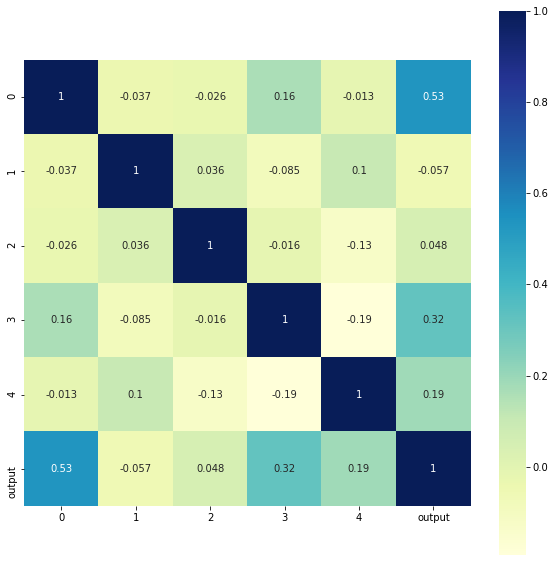

In [757]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu", square=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9840c8c080>,
      dtype=object)

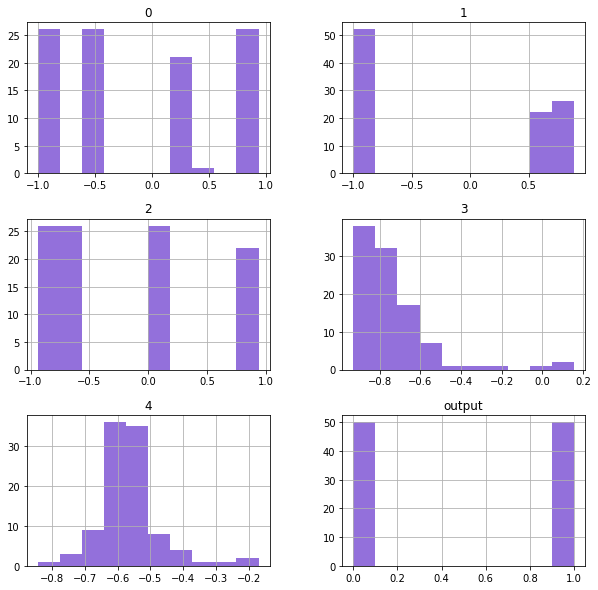

In [758]:
df.hist(figsize=(10,10),color='mediumpurple')

In [0]:
#Shuffling the Data
X, y_label = shuffle(X, y_label, random_state=0)

In [0]:
# X = preprocessing.normalize(X)
# Not a good idea
# X = preprocessing.scale(X)

# Baseline Logistic Regression

In [0]:
#1. Logistic reg
clf = LogisticRegression(random_state=0, class_weight='balanced', solver='lbfgs')


In [0]:
logreg = clf.fit(X, y_label)

In [0]:
y_pred = logreg.predict(X_test)

In [695]:
y_pred

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.])

In [696]:
auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.720


# Models


In [0]:
#2. Decision Tree
dectree =  DecisionTreeClassifier(random_state=0,max_depth=2, min_samples_leaf=5)

In [698]:
dectree.fit(X,y_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
y_pred_dt = dectree.predict(X_test)

In [700]:
y_pred_dt

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.])

In [701]:
auc = metrics.roc_auc_score(y_test, y_pred_dt)
print('AUC: %.3f' % auc)

AUC: 0.720


In [0]:
#3. Random forest

In [703]:
ranfor = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100,
                                oob_score=True, min_samples_leaf=5, n_jobs=100)
ranfor.fit(X, y_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=100, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf = ranfor.predict(X_test)

In [705]:
y_pred_rf

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

In [706]:
auc = metrics.roc_auc_score(y_test, y_pred_rf)
print('AUC: %.3f' % auc)

AUC: 0.750


In [0]:
#Slight increase in accuracy, with tweaking the parameters

In [0]:
#4. SGDClassifier

In [709]:
sgdclass = SGDClassifier(loss='hinge',random_state=0)
sgdclass.fit(X,y_label)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred_sgdc = sgdclass.predict(X_test)

In [711]:
y_pred_sgdc

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.])

In [712]:
auc = metrics.roc_auc_score(y_test, y_pred_sgdc)
print('AUC: %.3f' % auc)

AUC: 0.570


In [0]:
#5. Support Vector Machine

In [714]:
svc = SVC(gamma='auto',kernel='sigmoid')
svc.fit(X, y_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_svc=svc.predict(X_test)

In [716]:
y_pred_svc

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.])

In [717]:
auc = metrics.roc_auc_score(y_test, y_pred_svc)
print('AUC: %.3f' % auc)

AUC: 0.720


In [718]:
#6. Naive Bayes' Classifier
gnb = GaussianNB()
gnb.fit(X,y_label)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_gnb= gnb.predict(X_test)

In [720]:
auc = metrics.roc_auc_score(y_test, y_pred_gnb)
print('AUC: %.3f' % auc)

AUC: 0.690


In [721]:
#7. XGBoost
xgb = XGBClassifier(max_depth=2, booster='dart',shuffle=True,learning_rate=0.5,
                    n_estimators=100)
xgb.fit(X, y_label)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              shuffle=True, silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgb= xgb.predict(X_test)

In [723]:
auc = metrics.roc_auc_score(y_test, y_pred_xgb)
print('AUC: %.3f' % auc)

AUC: 0.710


In [724]:
# 8. AdaBoost
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y_label)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [0]:
y_pred_ada = clf.predict(X_test)

In [726]:
auc = metrics.roc_auc_score(y_test, y_pred_ada)
print('AUC: %.3f' % auc)

AUC: 0.660


# Hypothesis testing


In [0]:
#Testing the above models using only the 1,3 and 5th rows of the input.
X_test=np.delete(X_test,1,1)

In [0]:
X

# Conclusion.

I tried various Machine Learning classification Algorithms, and measured the accuracy using AUC.

1) During my feature analysis I noticed the two features had small correlation with the actual output. I ran the same set of experiement by removing those two columns, to test my Hypothesis. Turns out the AUC score more or less remains the same.

2) One factor that affected my models was the use of shuffle function to shuffle the input data.

3) I tried normalise and scaling the data to standard scale but it yielded bad AUC results.

4) Final scores of the algorithms I used are as follows (In the best runs):-

a) Baseline Logistic Regression -  0.720   
b) Decision Tree -  0.720  
c) Random Forest -   0.750  
d) SGDClassifier -   0.710  
e) SVM Classifier - 0.720  
f) Naive Bayes' Classifier - 0.690  
g) XGBoost - 0.710  
h) AdaBoost - 0.660  

**Random Forest** yielded best results for me.

5) I delibrately did not choose to use Neural Networks for this task as it does not work well with small data and might overfit the data.

I hope this analysis helps, please feel free to contact me for any questions/concerns.